# Regression on UCI dataset -  Airquality Index to determine the RH and AH.
Initailly performed keras tuner to know the number of hidden layers.
Based on the hyperparameters tunned, modelled the training model for prediction in Tensorflow 2.0.

In [2]:
import tensorflow as tf
import pandas as pd


In [3]:
tf.__version__


'2.3.1'

In [12]:
data = pd.read_csv('AirQualityUCI.csv')
data.copy()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3/23/2005,4:00:00,-200.0,993,-200,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919,Very low
9353,3/26/2005,4:00:00,-200.0,1122,-200,6.0,811,181,641,92,1336,1122,16.2,71.2,1.3013,Very low
9354,3/29/2005,4:00:00,-200.0,883,-200,1.3,530,63,997,46,1102,617,13.7,68.2,1.0611,Very low
9355,4/1/2005,4:00:00,-200.0,818,-200,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606,Very low


In [16]:
data.columns



Index(['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT',
       'PT08_S2_NMHC', 'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2',
       'PT08_S5_O3', 'T', 'RH', 'AH', 'CO_level'],
      dtype='object')

In [13]:
data.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [90]:
X = data[['CO_GT', 'PT08_S1_CO','C6H6_GT','PT08_S2_NMHC','Nox_GT','PT08_S3_Nox','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T']]
y = data[['RH','AH']]

In [91]:
X.head()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T
0,11.9,2008,50.6,1980,1389,325,220,2562,2342,12.4
1,11.5,1918,49.4,1958,1358,335,190,2477,2237,11.5
2,10.2,1802,47.7,1924,748,356,192,2235,2452,13.7
3,10.2,1982,49.5,1959,1369,322,227,2536,2386,13.2
4,10.1,1956,45.2,1877,1389,347,255,2338,2465,15.5


In [92]:
y.head()

,RH,AH
0,74.7,1.0741
1,76.2,1.0324
2,52.8,0.8244
3,72.6,1.0936
4,62.8,1.0979


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)


In [96]:
X_train.shape,y_train.shape

((7485, 10), (7485, 2))

In [97]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(2, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_squared_error'])
    return model

In [98]:
tuner = RandomSearch(
    build_model,
    objective='mean_squared_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project1',
    project_name='AirqualityIndex_targets')

In [99]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [100]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))


Trial 5 Complete [00h 00m 15s]
mean_squared_error: 90.33604685465495

Best mean_squared_error So Far: 61.06870651245117
Total elapsed time: 00h 01m 25s
INFO:tensorflow:Oracle triggered exit


In [101]:
tuner.get_best_hyperparameters

<bound method BaseTuner.get_best_hyperparameters of <kerastuner.tuners.randomsearch.RandomSearch object at 0x7fea81c587b8>>

In [102]:
tuner.results_summary()

Results summary
Results in project1/AirqualityIndex_targets
Showing 10 best trials
Objective(name='mean_squared_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 384
units_1: 32
learning_rate: 0.001
units_2: 32
Score: 61.06870651245117
Trial summary
Hyperparameters:
num_layers: 19
units_0: 224
units_1: 416
learning_rate: 0.0001
units_2: 192
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 32
Score: 68.57790883382161
Trial summary
Hyperparameters:
num_layers: 3
units_0: 160
units_1: 128
learning_rate: 0.01
units_2: 448
Score: 85.65415445963542
Trial summary
Hyperparameters:
num_layers: 4
units_0: 320
units_1: 224
learning_rate: 0.01
units_2: 480
units_3: 32
units_4: 352
units_5: 96
units_6: 480
units_7: 192
units_8: 416
units_9: 480
units_10: 192
units_11: 384
units_12: 288
units_13: 256
units_14: 320
units_15: 

In [104]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


In [105]:
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(384, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(2,activation="linear")
])
model.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=0.001))
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
165/165 [==============================] - 0s 2ms/step - loss: 11.8886 - val_loss: 8.3222
Epoch 2/30
165/165 [==============================] - 0s 2ms/step - loss: 6.8280 - val_loss: 6.9459
Epoch 3/30
165/165 [==============================] - 0s 2ms/step - loss: 6.6024 - val_loss: 6.8545
Epoch 4/30
165/165 [==============================] - 0s 2ms/step - loss: 5.2957 - val_loss: 6.0208
Epoch 5/30
165/165 [==============================] - 0s 2ms/step - loss: 5.1261 - val_loss: 4.4648
Epoch 6/30
165/165 [==============================] - 0s 2ms/step - loss: 5.1655 - val_loss: 4.5832
Epoch 7/30
165/165 [==============================] - 0s 3ms/step - loss: 4.7276 - val_loss: 5.3894
Epoch 8/30
165/165 [==============================] - 0s 2ms/step - loss: 4.7098 - val_loss: 4.1888
Epoch 9/30
165/165 [==============================] - 0s 2ms/step - loss: 4.5354 - val_loss: 4.7095
Epoch 10/30
165/165 [==============================] - 0s 2ms/step - loss: 4.3491 - val_loss: 3.810

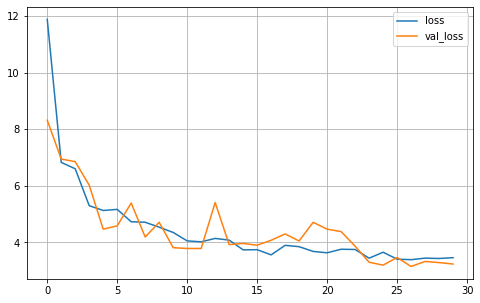

In [106]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [107]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

74/74 [==============================] - 0s 1ms/step - loss: 3.2983
